## NumPy 的图像应用

### 1. Creating array views and copies
- 创建数组的视图和拷贝

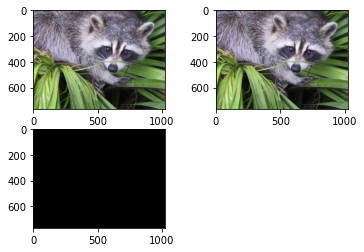

In [16]:
# 获取浣熊脸的1024 x 768彩色图像
import scipy.misc
import scipy
import matplotlib.pyplot as plt

face = scipy.misc.face()
acopy = face.copy()
aview = face.view()                     # 创建视图，不可写入，会报错
# aview.flags
a = aview.copy()                        # 创建副本，可写入
a.flat = 0
# aview.flat = 0            
plt.subplot(221)
plt.imshow(face)                        # aview.copy() 为深拷贝，不改变原来 face 的值，故而第一张图片不变黑
plt.subplot(222)
plt.imshow(acopy)
plt.subplot(223)
plt.imshow(a)
plt.show()

### 2. fancy indexing
- 花式索引
- 步骤：
    - (1) 创建迭代器对象
    - (2) 将迭代器对象绑定到数组
    - (3) 经由迭代器访问数组元素，利用位置列表进行索引

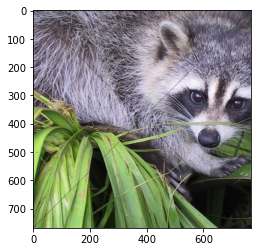

In [17]:
import scipy.misc
import matplotlib.pyplot as plt

face = scipy.misc.face()
xmax = face.shape[0]
ymax = face.shape[1]
a = face[:min(xmax,ymax),:min(xmax,ymax)]           # 不可写
xmax = a.shape[0]
ymax = a.shape[1]
b = a.copy()                                        # 只能创建可写的副本进行处理
# b.flags                   
b[range(xmax), range(ymax)] = 0                     # 将第一条对角线上的值设为0
b[range(xmax-1,-1,-1), range(ymax)] = 0             # 将另一条对角线上的值设为0
plt.imshow(b)
plt.show()                                          # 相片对角线

### 3. indexing with list of locations
- 基于位置列表的索引方法

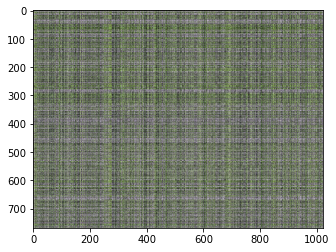

In [18]:
import scipy.misc
import matplotlib.pyplot as plt
import numpy as np

face = scipy.misc.face()
xmax = face.shape[0]
ymax = face.shape[1]

# 打乱数组的索引
def shuffle_indices(size):
   arr = np.arange(size)
   np.random.shuffle(arr)

   return arr

xindices = shuffle_indices(xmax)
np.testing.assert_equal(len(xindices), xmax)
yindices = shuffle_indices(ymax)
np.testing.assert_equal(len(yindices), ymax)
# 画出打乱后的索引
plt.imshow(face[np.ix_(xindices, yindices)])
plt.show()

### 4. indexing arrays with booleans
- 布尔型变量索引

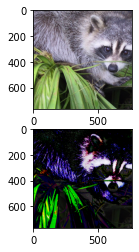

In [19]:
import scipy.misc
import matplotlib.pyplot as plt
import numpy as np

face = scipy.misc.face()
xmax = face.shape[0]
ymax = face.shape[1]
face=face[:min(xmax,ymax),:min(xmax,ymax)]

def get_indices(size):
   arr = np.arange(size)
   return arr % 4 == 0

face1 = face.copy() 
xindices = get_indices(face.shape[0])
yindices = get_indices(face.shape[1])
face1[xindices, yindices] = 0
plt.subplot(211)
plt.imshow(face1)
face2 = face.copy() 
face2[(face > face.max()/4) & (face < 3 * face.max()/4)] = 0
plt.subplot(212)
plt.imshow(face2)
plt.show()

### 5. broadcasting arrays
- 广播机制
- 目的：将下载的音频文件处理生成一个新的静音版本
- 步骤：
    - (1) 读取 **WAV** 文件
    - (2) 绘制原 WAV 数据
    - (3) 新建一个数组
    - (4) 写入一个 WAV 文件
    - (5) 绘制出新的 WAV 数据

Content-Type: audio/wav
Last-Modified: Tue, 12 Aug 2014 15:53:40 GMT
Accept-Ranges: bytes
ETag: "01ad89545b6cf1:0"
Server: Microsoft-IIS/10.0
X-Powered-By: ASP.NET
Date: Fri, 20 Jan 2023 14:17:52 GMT
Connection: close
Content-Length: 43642


Data type uint8 Shape (43584,)
Data type uint8 Shape (43584,)


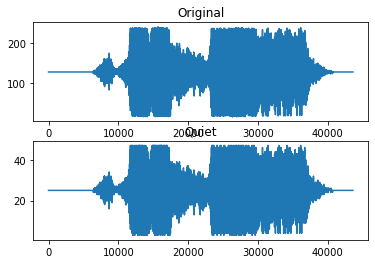

In [1]:
import scipy.io.wavfile as sw                   # 加载音频数据，生成 WAV 格式文件
import matplotlib.pyplot as plt
import urllib
import numpy as np

request = urllib.request.Request('http://www.thesoundarchive.com/austinpowers/smashingbaby.wav')
response = urllib.request.urlopen(request)
print(response.info())
WAV_FILE = 'smashingbaby.wav'
filehandle = open(WAV_FILE, 'wb')
filehandle.write(response.read())
filehandle.close()
sample_rate, data = sw.read(WAV_FILE)
print("Data type", data.dtype, "Shape", data.shape)

plt.subplot(2, 1, 1)
plt.title("Original")
plt.plot(data)

newdata = data * 0.2
newdata = newdata.astype(np.uint8)
print("Data type", newdata.dtype, "Shape", newdata.shape)

sw.write("quiet.wav",
    sample_rate, newdata)

plt.subplot(2, 1, 2)
plt.title("Quiet")
plt.plot(newdata)

plt.show()